In [55]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np
from sklearn.metrics import mean_squared_error
import warnings

In [21]:
data = pd.read_csv("./insurance.csv")

In [16]:
# 从info（）中可以看到，数据没有缺失
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [17]:
# 需要对sex，smoker进行编码，方便后面的处理
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [18]:
data.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

In [22]:
# 这一行只能运行一遍，后面运行会出现编码错误
data['sex'] = data.sex.map({'male':0,'female':1})

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 73.3+ KB


In [24]:
data.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [25]:
# 对吸烟进行编码
data['smoker'] = data.smoker.map({'no':0,'yes':1})

In [27]:
data.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [28]:
data = pd.get_dummies(data,columns=['region'])

In [30]:
data.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,0,0,0,1
1,18,0,33.770,1,0,1725.55230,0,0,1,0
2,28,0,33.000,3,0,4449.46200,0,0,1,0
3,33,0,22.705,0,0,21984.47061,0,1,0,0
4,32,0,28.880,0,0,3866.85520,0,1,0,0


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   sex               1338 non-null   int64  
 2   bmi               1338 non-null   float64
 3   children          1338 non-null   int64  
 4   smoker            1338 non-null   int64  
 5   charges           1338 non-null   float64
 6   region_northeast  1338 non-null   uint8  
 7   region_northwest  1338 non-null   uint8  
 8   region_southeast  1338 non-null   uint8  
 9   region_southwest  1338 non-null   uint8  
dtypes: float64(2), int64(4), uint8(4)
memory usage: 68.1 KB


In [33]:
X=data.drop("charges",axis=1)

In [35]:
Y = data[["charges"]]

In [37]:
Y.values

array([[16884.924 ],
       [ 1725.5523],
       [ 4449.462 ],
       ...,
       [ 1629.8335],
       [ 2007.945 ],
       [29141.3603]])

In [38]:
X_train,x_test,Y_train,y_test = train_test_split(X,Y,train_size=0.7)

In [41]:
model1 = tf.keras.models.Sequential()

2022-10-07 11:23:35.576295: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-10-07 11:23:35.576389: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-10-07 11:23:35.576477: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (localhost.localdomain): /proc/driver/nvidia/version does not exist
2022-10-07 11:23:35.578274: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [42]:
X.shape

(1338, 9)

In [70]:
model1.add(tf.keras.layers.Dense(4,input_shape=(9,),activation="relu"))
# model1.add(tf.keras.layers.Dense(4,activation="relu"))

In [71]:
model1.add(tf.keras.layers.Dense(1))

In [72]:
model1.compile(optimizer="adam",loss="mse")

In [73]:
#  查看模型
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 40        
                                                                 
 dense_1 (Dense)             (None, 1)                 5         
                                                                 
 dense_2 (Dense)             (None, 4)                 8         
                                                                 
 dense_3 (Dense)             (None, 4)                 20        
                                                                 
 dense_4 (Dense)             (None, 1)                 5         
                                                                 
 dense_5 (Dense)             (None, 1)                 2         
                                                                 
 dense_6 (Dense)             (None, 4)                 8

In [74]:
his=model1.fit(X_train,Y_train,epochs=1000)

Epoch 1/1000
30/30 [==============================] - 1s 3ms/step - loss: 314321696.0000
Epoch 2/1000
30/30 [==============================] - 0s 3ms/step - loss: 303882112.0000
Epoch 3/1000
30/30 [==============================] - 0s 3ms/step - loss: 285776096.0000
Epoch 4/1000
30/30 [==============================] - 0s 3ms/step - loss: 255552080.0000
Epoch 5/1000
30/30 [==============================] - 0s 3ms/step - loss: 209150304.0000
Epoch 6/1000
30/30 [==============================] - 0s 3ms/step - loss: 147253072.0000
Epoch 7/1000
30/30 [==============================] - 0s 2ms/step - loss: 90347248.0000
Epoch 8/1000
30/30 [==============================] - 0s 2ms/step - loss: 59854628.0000
Epoch 9/1000
30/30 [==============================] - 0s 2ms/step - loss: 54577284.0000
Epoch 10/1000
30/30 [==============================] - 0s 2ms/step - loss: 53575776.0000
Epoch 11/1000
30/30 [==============================] - 0s 3ms/step - loss: 52441356.0000
Epoch 12/1000
30/30 [===

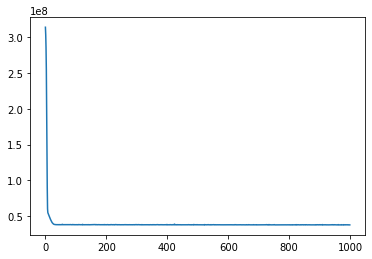

In [75]:
plt.plot(his.epoch,his.history.get("loss"))

In [76]:
pred = model1.predict(x_test)

13/13 [==============================] - 0s 2ms/step


In [77]:
mean_squared_error(pred,y_test)

34209155.20275702